In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Specify the path to your CSV file
file_path = "Data/IntegrationData.csv"

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop([df.index[-1]])

# Display the DataFrame (optional)
print(len(df))

33


In [3]:
selected_columns = df[['Name', 'Aarea_hectare', 'Population', 'Traffic_low', 'Income_weekly_pay', 'Average_house_prices ', 'Life_expectancy', 'Good_mental_health_rate']].rename(columns={
    'Name': 'Name_of_Borough',
    'Aarea_hectare': 'Area_of_Borough',
    'Traffic_low': 'Traffic_Flow', 
    'Income_weekly_pay': 'Weekly_Income',
    'Average_house_prices ': 'Average_House_Price',
    'Life_expectancy': 'Life_Expectancy',
    'Good_mental_health_rate': 'Good_Mental_Health_Rate'})

In [4]:
# Formatting population
columns_need_to_be_cleaned = ['Population']
for m in columns_need_to_be_cleaned:
    selected_columns[m] = (
        selected_columns[m]
        .str.replace(",", "", regex=False)
        .astype("float")
    )

In [5]:
selected_columns['Per_Capita_Area'] = round((selected_columns['Area_of_Borough']*10000) / selected_columns['Population'], 2)

selected_columns['Weekly_Income'] = selected_columns['Weekly_Income'].str.replace('!', '1169.86').astype("float")

selected_columns['Life_Expectancy'] = selected_columns['Life_Expectancy'].str.replace('!', '0').astype("float")
selected_columns['Life_Expectancy'][0] = round(selected_columns['Life_Expectancy'].mean(),2)

selected_columns['Good_Mental_Health_Rate'] = selected_columns['Good_Mental_Health_Rate'].str.replace('!', '0').astype("float")
selected_columns['Good_Mental_Health_Rate'][0] = round(selected_columns['Good_Mental_Health_Rate'].mean(),2)

/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60966/1705291517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Life_Expectancy'][0] = round(selected_columns['Life_Expectancy'].mean(),2)
/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60966/1705291517.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Good_Mental_Health_Rate'][0] = round(selected_columns['Good_Mental_Health_Rate'].mean(),2)


In [6]:
# Select the columns you want to normalize
columns_to_normalize = ['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy', 'Average_House_Price', 'Traffic_Flow', 'Good_Mental_Health_Rate']

# Create a MinMaxScaler
scaler = MinMaxScaler()

selected_columns_normalised = selected_columns[['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy', 'Average_House_Price', 'Traffic_Flow','Good_Mental_Health_Rate']]

# Apply Min-Max scaling to the selected columns
selected_columns_normalised[columns_to_normalize] = scaler.fit_transform(selected_columns[columns_to_normalize])

/var/folders/8j/8kd0xqpj7ds99_dv1jwzppjc0000gn/T/ipykernel_60966/3299308331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_normalised[columns_to_normalize] = scaler.fit_transform(selected_columns[columns_to_normalize])


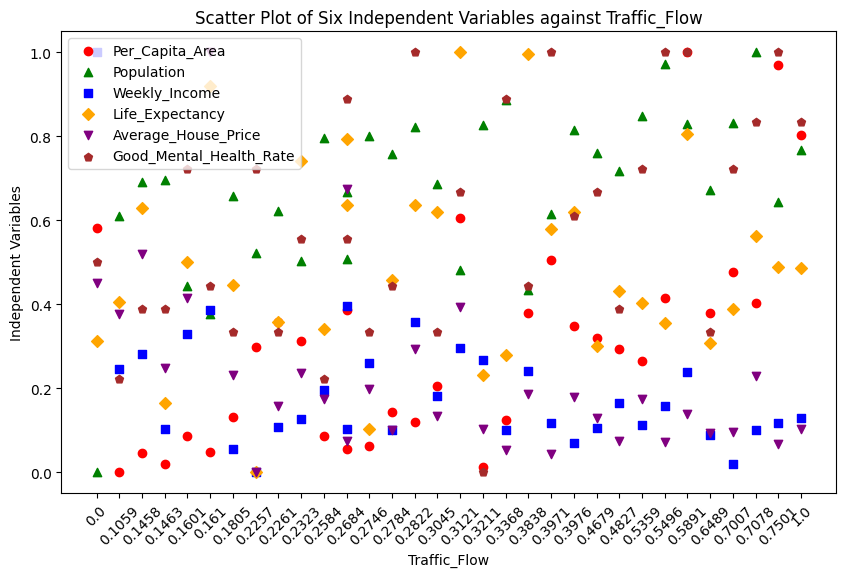

In [7]:
selected_columns_normalised = selected_columns_normalised.sort_values(by='Traffic_Flow')

selected_columns_normalised['Traffic_Flow'] = round(selected_columns_normalised['Traffic_Flow'],4).astype(str)

y_variables = ['Per_Capita_Area', 'Population', 'Weekly_Income', 'Life_Expectancy', 'Average_House_Price', 'Good_Mental_Health_Rate']

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
markers = ['o', '^', 's', 'D', 'v', 'p']

plt.figure(figsize=(10, 6))

for i, y_var in enumerate(y_variables):
    plt.scatter(selected_columns_normalised['Traffic_Flow'].astype(str), selected_columns_normalised[y_var], label=y_var, color=colors[i], marker=markers[i])

plt.title('Scatter Plot of Six Independent Variables against Traffic_Flow')
plt.xlabel('Traffic_Flow')
plt.ylabel('Independent Variables')
plt.legend()
plt.xticks(rotation=45)

plt.show()